In [5]:
import sys
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import make_column_transformer

sys.path.append("/Users/nwong/Workspace/Projects/tdt4173_project/src")

from feature_engineering.sklearn_transformers import *
from feature_engineering.store_features import *
from feature_engineering.utils import *

In [71]:
stores_train_df = set_year_2016(pd.read_csv("/Users/nwong/Workspace/Projects/tdt4173_project/data/raw/stores_train.csv"))
stores_test_df = set_year_2016(pd.read_csv("/Users/nwong/Workspace/Projects/tdt4173_project/data/raw/stores_test.csv"))
stores_extra_df = set_year_2016(pd.read_csv("/Users/nwong/Workspace/Projects/tdt4173_project/data/raw/stores_extra.csv"))

income_dist = set_year_2016(pd.read_csv("/Users/nwong/Workspace/Projects/tdt4173_project/data/raw/grunnkrets_income_households.csv"))
age_dist = set_year_2016(pd.read_csv("/Users/nwong/Workspace/Projects/tdt4173_project/data/raw/grunnkrets_age_distribution.csv"))
household_dist = set_year_2016(pd.read_csv("/Users/nwong/Workspace/Projects/tdt4173_project/data/raw/grunnkrets_households_num_persons.csv"))
grunnkrets_df = combine_keys(set_year_2016(pd.read_csv("/Users/nwong/Workspace/Projects/tdt4173_project/data/raw/grunnkrets_norway_stripped.csv")))
bus_stops_df = pd.read_csv("/Users/nwong/Workspace/Projects/tdt4173_project/data/raw/busstops_norway.csv")


bus_stops_df = pd.read_csv("/Users/nwong/Workspace/Projects/tdt4173_project/data/raw/busstops_norway.csv")


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

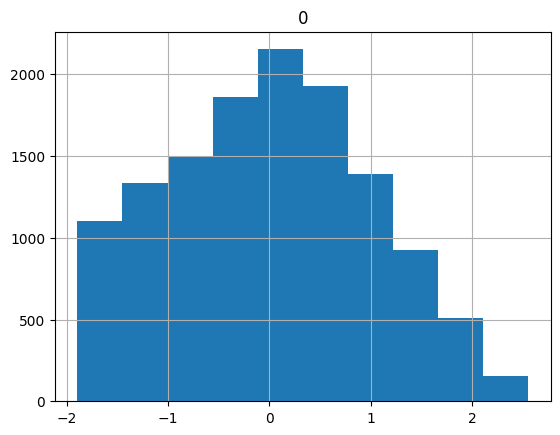

In [72]:
yeo_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    PowerTransformer()
)
preprocessing = make_column_transformer(
    (yeo_pipeline, ['revenue', 'lat', 'lon'])
)
pd.DataFrame(preprocessing.fit_transform(stores_train_df)[:,0]).hist()

In [75]:
stop_importance_levels = ['Mangler viktighetsnivå',
                          'Standard holdeplass',
                          'Lokalt knutepunkt',
                          'Nasjonalt knutepunkt',
                          'Regionalt knutepunkt',
                          'Annen viktig holdeplass']
bus_stops_distance_by_importance(stores_train_df, bus_stops_lat_lon(bus_stops_df), stop_importance_levels)

,distance_to_mangler_viktighetsnivå,distance_to_standard_holdeplass,distance_to_lokalt_knutepunkt,distance_to_nasjonalt_knutepunkt,distance_to_regionalt_knutepunkt,distance_to_annen_viktig_holdeplass
store_id,,,,,,
983540538-974187930-44774,0.005315,0.012600,0.005467,0.294614,0.016952,0.155313
987074191-973117734-44755,0.001579,0.045599,0.001257,0.020375,0.001559,0.116319
984890265-981157303-64491,0.000371,0.011161,0.025783,0.326362,0.017330,0.054763
914057442-992924179-126912,0.005329,0.010858,0.016854,0.012352,0.000522,5.257526
913018583-913063538-668469,0.003096,0.002093,0.003370,0.319223,0.644539,0.006737
...,...,...,...,...,...,...
915789943-915806929-781991,0.001349,0.008576,0.006203,0.176835,0.005978,0.009062
917921733-917982368-868081,0.002951,0.118968,0.022918,0.333546,0.051408,0.168095
911721961-911764474-496764,0.001587,0.102015,0.025107,0.249433,0.032679,0.037453
